In [1]:
# Imports
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff

import numpy as np
import pandas as pd
import scipy

init_notebook_mode(connected=True)

import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

%matplotlib notebook 

There are certain set of assumptions that applicable when working with regression problems .Take for instance  linear regression where we have the following assumptions- 
1) we assume that we have a linear relationship between independent variable and the target variable. 
2) our data is homoscedastic  
3) residuals have a normal distributions 
4) Minimal multicollinearity 

The subject of this notebook is the third point- How do we know that the residuals due to linear regression model is normally distributed or not? This leads to a more general question. Given a dataset, can we say that the data is normally distributed or not? This seems like a fairly trivial question. Well, just plot the histogram of the data and see if it looks like a normal distribution. Histograms can be deceptive, it depends on the number of bins you choose and depends on the number of data points you have. 

Thankfully, there are certain tools available to us in order to determine if a dataset comes from a normal distribution or not. 

In this notebook we are going to cover the following tools- 
1) Graphical way: Histogram
2) Graphical way: Quantile-quantile(qq) plots 
3) Statistical test: K-S test 
4) Statistical test: Anderson-Darling tests

The collection of tests that are used to determine if a data is normal are called normality tests.


Before we get into it, let us set up a problem. We generate a dataset and set up a linear regression problem. We fit a model to it and get the residues. 


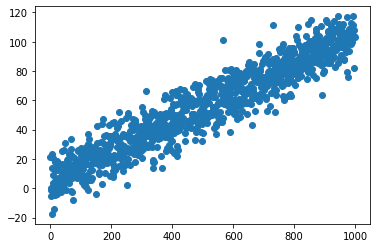

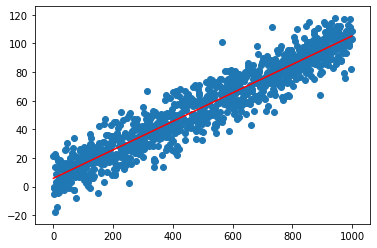

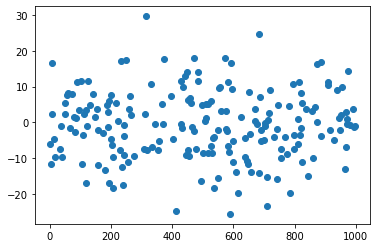

In [7]:
# generate data and visualize it
np.random.seed(1)
x = np.arange(0,1000)
noise = np.random.normal(0,10,1000)
slope = 0.1
b = 5.0 

y = (slope*x)+b 
y_noised =  y+noise
plt.figure()
plt.scatter(x,y_noised)
plt.show()


# test train split 
x_train, x_test, y_train, y_test = train_test_split(x,y_noised, test_size=0.2, random_state=1)

x_train_shape = x_train.shape[0]
y_train_shape = y_train.shape[0]

x_train_reshaped = x_train.reshape(x_train_shape, 1)
y_train_reshaped = y_train.reshape(y_train_shape, 1)


x_test_shape = x_test.shape[0]
x_test_reshaped = x_test.reshape(x_test_shape, 1)


# fitting the model in sklearn 

lr = LinearRegression()
lr.fit(x_train_reshaped, y_train_reshaped)

pred_slope = lr.coef_
pred_b = lr.intercept_

# fitting the model line to the data 
model_line = (pred_slope*x)+pred_b
model_line_reshaped = model_line.reshape(model_line.shape[1])
plt.figure()
plt.plot(x, model_line_reshaped, color="red")
plt.scatter(x, y_noised)


# get resiuduals and plot it 
y_pred= lr.predict(x_test_reshaped)

residuals = y_test - y_pred.reshape(y_pred.shape[0],)
plt.figure()
plt.scatter(x_test,residuals)
plt.show()


Figure 3 is a plot of residuals. A residual is the difference between the actual value, which are the blue point in Figure 2 and the predicted values, which fall on the red line. One of the assumptions of linear regression is that the residuals are drawn from a normal distribution, another way of saying this would be that we if plot a histogram of it, we expect it but normal-like. 



In [9]:
trace = go.Histogram(
    x=residuals
)

iplot([trace], filename='normality-histogram')

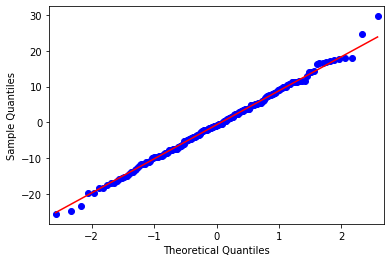

In [10]:
from statsmodels.graphics.gofplots import qqplot

qqplot_data = qqplot(residuals, line='s').gca().lines


In [11]:
fig = go.Figure()

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[0].get_xdata(),
    'y': qqplot_data[0].get_ydata(),
    'mode': 'markers',
    'marker': {
        'color': '#19d3f3'
    }
})

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[1].get_xdata(),
    'y': qqplot_data[1].get_ydata(),
    'mode': 'lines',
    'line': {
        'color': '#636efa'
    }

})


fig['layout'].update({
    'title': 'Quantile-Quantile Plot',
    'xaxis': {
        'title': 'Theoritical Quantities',
        'zeroline': False
    },
    'yaxis': {
        'title': 'Sample Quantities'
    },
    'showlegend': False,
    'width': 800,
    'height': 700,
})


iplot(fig, filename='normality-QQ')